In [2]:
# Ruiqing Yu
# EDA Project



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("twitchdata-update.csv")
data_df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
data_df.info()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


(1000, 11)

In [5]:
data_df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [6]:
# What is the distribution of watch time and followers? Any outliers?
# Is the streaming industry dominated by a few big streamers or equally shared by a huge number of streamers? 
# What are some efficient ways to gain followers?

In [7]:
new_data=data_df.drop(["Partnered", "Mature", "Language"], axis=1)
new_data.head()


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587


In [8]:
watch_time= new_data["Watch time(Minutes)"]
# convert watch time to millions of minutes
watch_time_new = watch_time/1000000
watch_time_new.describe()

count    1000.000000
mean      418.427930
std       549.635514
min       122.192850
25%       163.189894
50%       234.990788
75%       433.739917
max      6196.161750
Name: Watch time(Minutes), dtype: float64

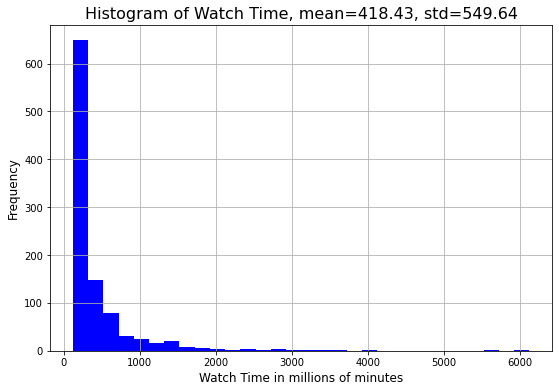

In [9]:

bin_value = np.arange(start = watch_time_new.min(), stop = watch_time_new.max(),step =200)
plt.figure(figsize=[9,6])
n, bins, patches = plt.hist(watch_time_new, bins = bin_value, color = "b")
plt.title("Histogram of Watch Time, mean=418.43, std=549.64",size = 16)
plt.xlabel("Watch Time in millions of minutes", size = 12)
plt.ylabel("Frequency", size = 12)
plt.grid(True)




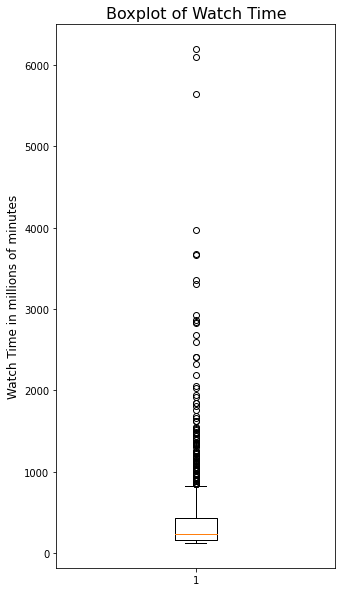

In [10]:
plt.figure(figsize=[5,10])
plt.boxplot(watch_time_new)
plt.ylabel("Watch Time in millions of minutes", size = 12)
plt.title("Boxplot of Watch Time", size = 16)
plt.show()

In [11]:
followers= new_data["Followers"]
# convert number of followers to thousands
followers_new = followers/1000
followers_new.describe()

count    1000.000000
mean      570.054068
std       804.413368
min         3.660000
25%       170.546250
50%       318.063000
75%       624.332250
max      8938.903000
Name: Followers, dtype: float64

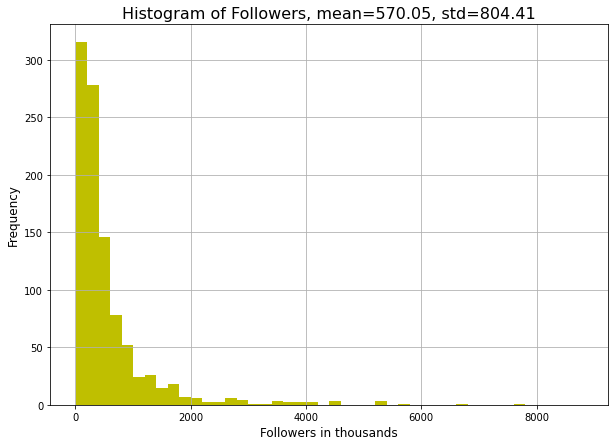

In [12]:
bin_value = np.arange(start = followers_new.min(), stop = followers_new.max(),step =200)
plt.figure(figsize=[10,7])
n, bins, patches = plt.hist(followers_new, bins = bin_value, color ="y")
plt.title("Histogram of Followers, mean=570.05, std=804.41",size = 16)
plt.xlabel("Followers in thousands", size = 12)
plt.ylabel("Frequency", size = 12)
plt.grid(True)


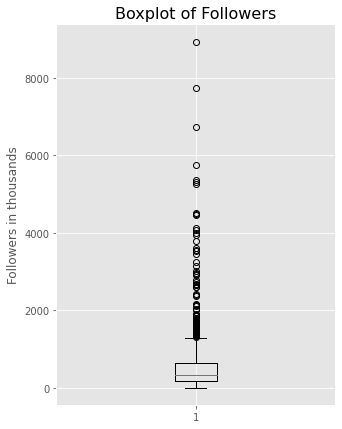

In [21]:
plt.figure(figsize=[5,7])
plt.boxplot(followers_new)
plt.ylabel("Followers in thousands", size = 12)
plt.title("Boxplot of Followers", size = 16)
plt.show()

In [14]:
# Hypothesis 1: The streaming industry is dominated by a few big streamers, ie. a minority of streamers claims
# the majority of watch time and followers.

6.111864513216069
39.87129214418534
55.401425362063705


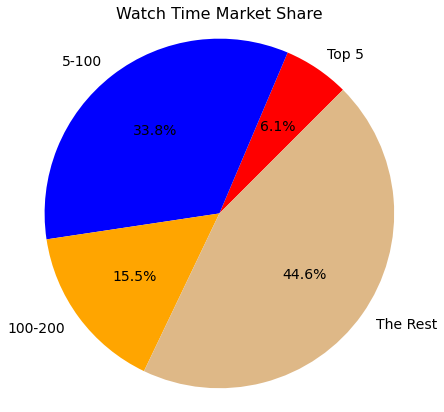

In [15]:
watch_time= new_data["Watch time(Minutes)"]
watch_time.sort_values(ascending=False)
top_5 = watch_time[:5].sum()/watch_time[:].sum()
P_top_5 = top_5*100
print(P_top_5)
P_top_100 = watch_time[5:100].sum()/watch_time[:].sum()*100
print(P_top_100+P_top_5)
P_top_200 = watch_time[100:200].sum()/watch_time[:].sum()*100
print(P_top_200+P_top_100+P_top_5)
rest = 100 - P_top_5 - P_top_100-P_top_200
name = ["Top 5", "5-100", "100-200", "The Rest"]
time_MS = [P_top_5, P_top_100, P_top_200, rest]
plt.style.use('ggplot')
plt.figure(figsize=[7,7])
plt.pie(time_MS, labels=name, autopct='%.1f%%', startangle=45, colors= ("r", "blue", "orange", "burlywood"), textprops={'fontsize': 14})
plt.title('Watch Time Market Share', size = 16)
plt.axis('equal')
plt.show() 

4.071166281020207
32.470192634429196
45.91215810778146
51.737967950085746


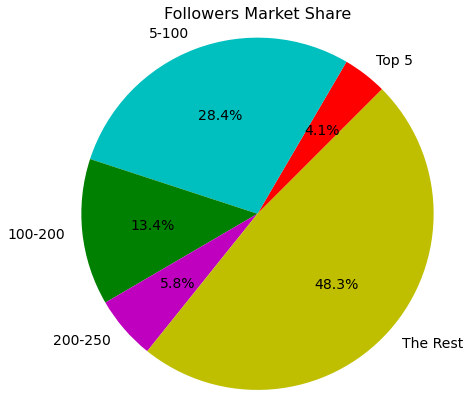

In [16]:
fo = new_data["Followers"]
fo.sort_values(ascending=False)
top_5 = fo[:5].sum()/fo[:].sum()
P_top_5 = top_5*100
print(P_top_5)
P_top_100 = fo[5:100].sum()/fo[:].sum()*100
print(P_top_100+P_top_5)
P_top_200 = fo[100:200].sum()/fo[:].sum()*100
print(P_top_200+P_top_100+P_top_5)
P_top_250 = fo[200:250].sum()/fo[:].sum()*100
print(P_top_200+P_top_100+P_top_5+P_top_250)
rest = 100 - P_top_5 - P_top_100-P_top_200-P_top_250
name1 = ["Top 5", "5-100", "100-200", "200-250", "The Rest"]
fo_MS = [P_top_5, P_top_100, P_top_200, P_top_250, rest]
plt.style.use('ggplot')
plt.figure(figsize=[7,7])
plt.pie(fo_MS, labels=name1, autopct='%.1f%%', startangle=45, colors= ("r", "c", "g", "m","y"), textprops={'fontsize': 14})
plt.title('Followers Market Share', size = 16)
plt.axis('equal')
plt.show() 

In [17]:
# Hypothesis 2: Increasing stream time is an efficient way to gain followers.

Text(0.5, 0, 'Followers Gained (millions)')

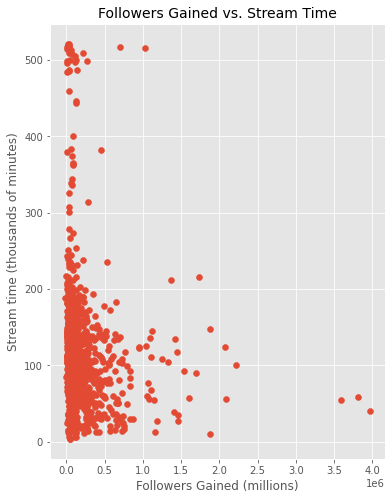

In [18]:
plt.figure(figsize=[6,8])
plt.title("Followers Gained vs. Stream Time", size = 14)
st = new_data["Stream time(minutes)"]/1000
plt.scatter(new_data["Followers gained"], st)
plt.ylabel("Stream time (thousands of minutes)")
plt.xlabel("Followers Gained (millions)")


In [19]:
new_data[new_data.columns[1:]].corr()["Followers gained"]

Watch time(Minutes)     0.514648
Stream time(minutes)   -0.158165
Peak viewers            0.470415
Average viewers         0.420097
Followers               0.715618
Followers gained        1.000000
Views gained            0.244297
Name: Followers gained, dtype: float64